In [12]:
# stream data

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

import ssl

ssl._create_default_https_context = ssl._create_unverified_context

arrestData = pd.read_csv("PPAD.csv")

nPopulations = pd.read_csv("totalPopulation.csv", index_col = 'Id')

eduA = pd.read_csv("eduAttainment.csv")


#eduA.head(10)

In [3]:
# create dict of neighborhoods w default vals
nc = {}

for i in range(1, len(nPopulations)):
    nValue = nPopulations.loc[i, "Neighborhood"]
    if(nValue not in nc):
        nc[nValue] = 0
#print(nc)  

In [4]:
# create dict of neighborhoods : populations

numOfNeighborhoods = 0

for i in range(len(nPopulations)):
    numOfNeighborhoods += 1

pop = {}

for i in range(1, len(nPopulations)):
    val = nPopulations.loc[i, "Neighborhood"]
    if(val in nPopulations.values):
        pop[val] = nPopulations.get_value(nPopulations.loc[nPopulations['Neighborhood'] == val].index[0], 'Estimate; Total')

#pop

/ihome/crc/install/python/miniconda3-3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]


In [5]:
# create dict of neighborhoods : crimes

for i in range(len(arrestData)):
    nValue = arrestData.loc[i, "INCIDENTNEIGHBORHOOD"]
    if(nValue in nc):
        nc[nValue] += 1
#nc   

In [6]:
# create dict of neighborhoods : arrest rates (per 100k)

for key, value in nc.items():
    nc[key] = (value / pop[key]) * 100000
#nc

In [27]:
# eliminate neighborhoods above natl arrest rate

ncUpdated = {}

NATL_ARREST_RATE = 3152.6

for key, value in nc.items():
    if(value <= NATL_ARREST_RATE):
        ncUpdated[key] = value
ncUpdated

{'Central Northside': 795.2973720608575,
 'Lincoln Place': 2886.539011146042,
 'Mount Oliver Borough': 353.045013239188,
 'New Homestead': 2261.0483042137716,
 'North Oakland': 2322.4328264944807,
 'Regent Square': 1839.3030009680542,
 'Squirrel Hill North': 1332.0395201129147,
 'Squirrel Hill South': 2736.566512903628,
 'Stanton Heights': 2415.458937198068,
 'Swisshelm Park': 1486.988847583643}

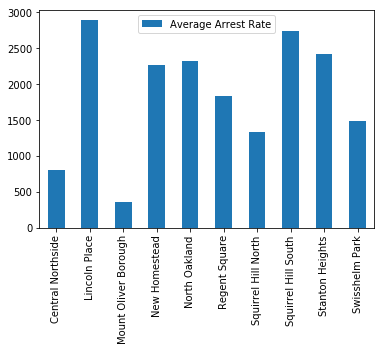

In [32]:
# graph of neighborhoods below natl arrest rate 

nBelowNAR = pd.DataFrame.from_dict(ncUpdated, orient = 'index', columns = ['Average Arrest Rate'])

nBelowNAR.plot(kind = 'bar', rot = 90)

In [8]:
# create dict of all neighborhoods : education levels
# sufficient education defined as completion of HS or greater

allEduLevels = {}

for i in range(len(eduA)):
    totalVal = eduA.loc[i, "Estimate; Total:"]
    hsGradNum = eduA.loc[i, "Estimate; Total: - Regular high school diploma"]
    collegeUnderOne = eduA.loc[i, "Estimate; Total: - Some college, less than 1 year"]
    collegeOnePlus = eduA.loc[i, "Estimate; Total: - Some college, 1 or more years, no degree"]
    associates = eduA.loc[i, "Estimate; Total: - Associate's degree"]
    bachelors = eduA.loc[i, "Estimate; Total: - Bachelor's degree"]
    masters = eduA.loc[i, "Estimate; Total: - Master's degree"]
    professional = eduA.loc[i, "Estimate; Total: - Professional school degree"]
    doctorate = eduA.loc[i, "Estimate; Total: - Doctorate degree"]
    totalEdu = hsGradNum + collegeUnderOne + collegeOnePlus + associates + bachelors + masters + professional + doctorate
    neigh = eduA.loc[i, "Neighborhood"]
    if(neigh not in allEduLevels):
        allEduLevels[neigh] = totalEdu / totalVal

#allEduLevels

In [11]:
# create dict of select neighborhoods :  education level

selectEduLevels = {}

for key in ncUpdated.keys():
    if(key not in selectEduLevels):
        selectEduLevels[key] = allEduLevels[key]

selectEduLevels

{'Central Northside': 0.8506111362607515,
 'Lincoln Place': 0.8523464326592903,
 'Mount Oliver Borough': 0.7085137085137085,
 'New Homestead': 0.8847795163584637,
 'North Oakland': 0.9298245614035088,
 'Regent Square': 0.9874686716791979,
 'Squirrel Hill North': 0.9797030633339597,
 'Squirrel Hill South': 0.9524178950090509,
 'Stanton Heights': 0.90607424071991,
 'Swisshelm Park': 0.873405299313052}

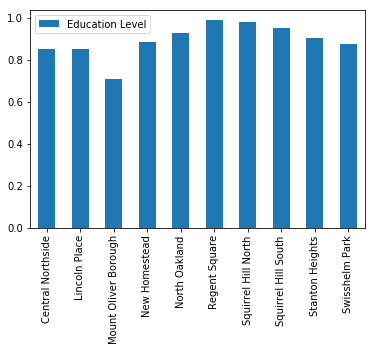

In [26]:
# select edu levels graph

selectEduLevelsDF = pd.DataFrame.from_dict(selectEduLevels, orient = 'index', columns = ['Education Level'])

selectEduLevelsDF.plot(kind = 'bar', rot = 90)


In [10]:
# find neighborhood with highest education rate

maxVal = max(selectEduLevels.values())

for key, value in selectEduLevels.items():
    if(value == maxVal):
        print("The best neighborhood in Pittsburgh is: " + key)

The best neighborhood in Pittsburgh is: Regent Square
